# Sentimental analysis for hate speech detection or emotion detection

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [20]:
train_data = pd.read_csv(r"C:\Users\USER\Downloads\train.txt", header = None, sep =';' ,
                         names =['comments', 'Emotion'], encoding = 'utf-8')

In [21]:
train_data

,comments,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [22]:
train_data['length'] = [len(x) for x in train_data['comments']]

In [23]:
train_data


,comments,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [25]:
train_data.isnull().sum()

comments    0
Emotion     0
length      0
dtype: int64

In [27]:
train_data.duplicated().sum()

1

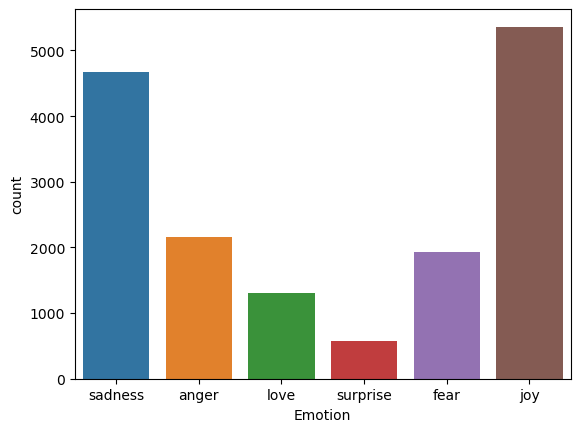

In [29]:
sns.countplot(x = train_data['Emotion'])
plt.show()

In [30]:
df = train_data.copy()

In [31]:
df['length'] = [len(x) for x in df['comments']]

In [32]:
df

,comments,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [ ]:
length_values = df['length'].values

In [ ]:
sns.histplot(x = 'length', hue ='comments', multiple = 'stack', data =df)
plt.show()

here now you can use word clouds for seeing or exploring all the worrds and for that i have already called 
wordclouds at the very starting of the notebook.  

NOW WE WILL BE DOING PRE PROCCESSING OF THE DATA

In [ ]:
lb = LabelEncoder()
train_data = lb.fit_transform(train_data['Emotion'])

In [ ]:
df2 = train_data.copy()